# Heat Transfer Post Process:

## Packages:

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Simulation Data:

In [2]:
#Import Series Data
Results_Ideal=[]
Results_NN=[]
Results_RF=[]
Results_SVR=[]
Results_GPR=[]
Results_TF=[]
T_ref = np.array([10,20,30,40,50])

for T in T_ref:
    Results_Ideal.append(np.genfromtxt('Stick_Ideal/Results/T_ref_'+str(T)+'.xy'))
    Results_NN.append(np.genfromtxt('Stick_ML_ONNX/Results/NN/T_ref_'+str(T)+'.xy'))
    Results_RF.append(np.genfromtxt('Stick_ML_ONNX/Results/RF/T_ref_'+str(T)+'.xy'))
    Results_SVR.append(np.genfromtxt('Stick_ML_ONNX/Results/SVR/T_ref_'+str(T)+'.xy'))
    Results_GPR.append(np.genfromtxt('Stick_ML_ONNX/Results/GPR/T_ref_'+str(T)+'.xy'))
    Results_TF.append(np.genfromtxt('Stick_ML_TF/Results/T_ref_'+str(T)+'.xy'))

## Plot Results

### TF_Backend Case

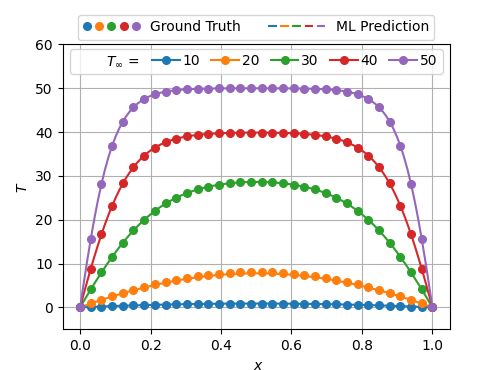

In [3]:
import matplotlib.legend_handler

fig, ax=plt.subplots(figsize = (5,3.7))
l_T = []
l_Ideal = []
l_ML = []

l_T.append(ax.plot([], [], ' ')[0])


for i in range(5):
    l_T.append(ax.plot([], [],linestyle = '-',color='C'+str(i),marker='o', markeredgecolor='C'+str(i),markerfacecolor='C'+str(i), markersize=5.5,markevery=3)[0])
    l_Ideal.append(ax.plot(Results_Ideal[i][:,0],Results_Ideal[i][:,1],linestyle = '', color='C'+str(i),marker='o', markeredgecolor='C'+str(i),markerfacecolor='C'+str(i), markersize=5.5,markevery=3)[0])
    l_ML.append(ax.plot(Results_TF[i][:,0],Results_TF[i][:,1],linestyle = '-', color='C'+str(i))[0])


ax.grid()
ax.set_ylabel(r"${T}$")
ax.set_xlabel(r" ${x}$")
ax.set_ylim(top=60, bottom=-5)

legend1=ax.legend(handles=l_T,
           labels=[r"${T}_\infty$ = ",'10','20','30','40','50'],
           ncol=6,
           borderaxespad=0.01,
           handletextpad=0.2,
           columnspacing=0.8,
           loc='center',bbox_to_anchor=(0.5,0.94))

handles = [(l_Ideal[0],l_Ideal[1],l_Ideal[2],l_Ideal[3],l_Ideal[4]), (l_ML[0],l_ML[1],l_ML[2],l_ML[3],l_ML[4])]
labels = ['Ground Truth','ML Prediction']

legend2=ax.legend(handles=handles,labels=labels,ncol=2,loc='center',
                  bbox_to_anchor=(0.5,1.06),
                  handlelength = 4,
                  handler_map = {tuple: matplotlib.legend_handler.HandlerTuple(None)})

plt.gca().add_artist(legend1)


### ONNX Backend Cases

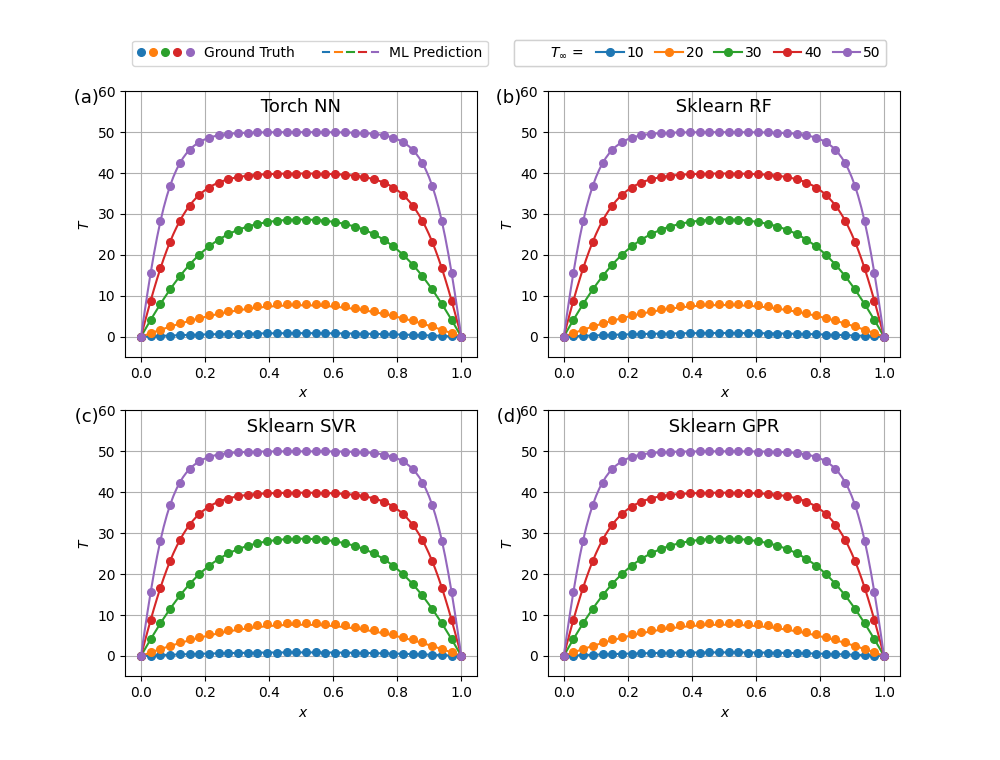

In [4]:
import matplotlib.legend_handler

fig, axs = plt.subplots(2, 2, figsize=(10, 7.6))

l_T = []
l_Ideal = []
l_NN = []

l_T.append(axs[0][0].plot([], [], ' ')[0])


for i in range(5):
    l_T.append(axs[0][0].plot([], [],linestyle = '-',color='C'+str(i),marker='o', markeredgecolor='C'+str(i),markerfacecolor='C'+str(i), markersize=5.5,markevery=3)[0])
    l_Ideal.append(axs[0][0].plot(Results_Ideal[i][:,0],Results_Ideal[i][:,1],linestyle = '', color='C'+str(i),marker='o', markeredgecolor='C'+str(i),markerfacecolor='C'+str(i), markersize=5.5,markevery=3)[0])
    l_NN.append(axs[0][0].plot(Results_NN[i][:,0],Results_NN[i][:,1],linestyle = '-', color='C'+str(i))[0])


axs[0][0].grid()
axs[0][0].set_ylabel(r"${T}$")
axs[0][0].set_xlabel(r" ${x}$")
axs[0][0].set_ylim(top=60, bottom=-5)

for i in range(5):
    axs[0][1].plot([], [],linestyle = '-',color='C'+str(i),marker='o', markeredgecolor='C'+str(i),markerfacecolor='C'+str(i), markersize=5.5,markevery=3)[0]
    axs[0][1].plot(Results_Ideal[i][:,0],Results_Ideal[i][:,1],linestyle = '', color='C'+str(i),marker='o', markeredgecolor='C'+str(i),markerfacecolor='C'+str(i), markersize=5.5,markevery=3)[0]
    axs[0][1].plot(Results_RF[i][:,0],Results_RF[i][:,1],linestyle = '-', color='C'+str(i))[0]


axs[0][1].grid()
axs[0][1].set_ylabel(r"${T}$")
axs[0][1].set_xlabel(r" ${x}$")
axs[0][1].set_ylim(top=60, bottom=-5)

for i in range(5):
    axs[1][0].plot([], [],linestyle = '-',color='C'+str(i),marker='o', markeredgecolor='C'+str(i),markerfacecolor='C'+str(i), markersize=5.5,markevery=3)[0]
    axs[1][0].plot(Results_Ideal[i][:,0],Results_Ideal[i][:,1],linestyle = '', color='C'+str(i),marker='o', markeredgecolor='C'+str(i),markerfacecolor='C'+str(i), markersize=5.5,markevery=3)[0]
    axs[1][0].plot(Results_SVR[i][:,0],Results_SVR[i][:,1],linestyle = '-', color='C'+str(i))[0]


axs[1][0].grid()
axs[1][0].set_ylabel(r"${T}$")
axs[1][0].set_xlabel(r" ${x}$")
axs[1][0].set_ylim(top=60, bottom=-5)

for i in range(5):
    axs[1][1].plot([], [],linestyle = '-',color='C'+str(i),marker='o', markeredgecolor='C'+str(i),markerfacecolor='C'+str(i), markersize=5.5,markevery=3)[0]
    axs[1][1].plot(Results_Ideal[i][:,0],Results_Ideal[i][:,1],linestyle = '', color='C'+str(i),marker='o', markeredgecolor='C'+str(i),markerfacecolor='C'+str(i), markersize=5.5,markevery=3)[0]
    axs[1][1].plot(Results_GPR[i][:,0],Results_GPR[i][:,1],linestyle = '-', color='C'+str(i))[0]


axs[1][1].grid()
axs[1][1].set_ylabel(r"${T}$")
axs[1][1].set_xlabel(r" ${x}$")
axs[1][1].set_ylim(top=60, bottom=-5)

legend1=fig.legend(handles=l_T,
           labels=[r"${T}_\infty$ = ",'10','20','30','40','50'],
           ncol=6,
           borderaxespad=0.01,
           handletextpad=0.2,
           columnspacing=0.8,
           loc='center',bbox_to_anchor=(0.7,0.93))

handles = [(l_Ideal[0],l_Ideal[1],l_Ideal[2],l_Ideal[3],l_Ideal[4]), (l_NN[0],l_NN[1],l_NN[2],l_ML[3],l_ML[4])]
labels = ['Ground Truth','ML Prediction']

legend2=fig.legend(handles=handles,labels=labels,ncol=2,loc='center',
                  bbox_to_anchor=(0.31,0.93),
                  handlelength = 4,
                  handler_map = {tuple: matplotlib.legend_handler.HandlerTuple(None)})

plt.gca().add_artist(legend1)

Txt_a = axs[0][0].text(-0.11, 0.956, r" (a) ",
                 ha='center', transform=axs[0][0].transAxes, fontsize=13)
Txt_b = axs[0][1].text(-0.11, 0.956, r" (b) ",
                 ha='center', transform=axs[0][1].transAxes, fontsize=13)

Txt_c = axs[1][0].text(-0.11, 0.956, r" (c) ",
                 ha='center', transform=axs[1][0].transAxes, fontsize=13)
Txt_d = axs[1][1].text(-0.11, 0.956, r" (d) ",
                 ha='center', transform=axs[1][1].transAxes, fontsize=13)


Txt_NN = axs[0][0].text(0.5, 0.92, r" Torch NN ",
                 ha='center', transform=axs[0][0].transAxes, fontsize=13)
Txt_RF = axs[0][1].text(0.5, 0.92, r" Sklearn RF ",
                 ha='center', transform=axs[0][1].transAxes, fontsize=13)

Txt_SVR = axs[1][0].text(0.5, 0.92, r" Sklearn SVR ",
                 ha='center', transform=axs[1][0].transAxes, fontsize=13)
Txt_GPR = axs[1][1].text(0.5, 0.92, r" Sklearn GPR ",
                 ha='center', transform=axs[1][1].transAxes, fontsize=13)





### Errors

In [5]:
np.squeeze(Results_Ideal[i][:,1])
np.squeeze(Results_Ideal[i][:,0])
Results_NN[i][:,1]

err_NN = 0
err_RF = 0
err_SVR = 0
err_GPR = 0


for i in range(5):
    err_NN = err_NN + np.sqrt(np.trapezoid((np.squeeze(Results_NN[i][:,1])-np.squeeze(Results_Ideal[i][:,1]))**2, np.squeeze(Results_Ideal[i][:,0]))) / (np.trapezoid(np.squeeze(Results_Ideal[i][:,1]), np.squeeze(Results_Ideal[i][:,0])))
    err_RF = err_RF + np.sqrt(np.trapezoid((np.squeeze(Results_RF[i][:,1])-np.squeeze(Results_Ideal[i][:,1]))**2, np.squeeze(Results_Ideal[i][:,0]))) / (np.trapezoid(np.squeeze(Results_Ideal[i][:,1]), np.squeeze(Results_Ideal[i][:,0])))
    err_SVR = err_SVR + np.sqrt(np.trapezoid((np.squeeze(Results_SVR[i][:,1])-np.squeeze(Results_Ideal[i][:,1]))**2, np.squeeze(Results_Ideal[i][:,0]))) / (np.trapezoid(np.squeeze(Results_Ideal[i][:,1]), np.squeeze(Results_Ideal[i][:,0])))
    err_GPR = err_GPR + np.sqrt(np.trapezoid((np.squeeze(Results_GPR[i][:,1])-np.squeeze(Results_Ideal[i][:,1]))**2, np.squeeze(Results_Ideal[i][:,0]))) / (np.trapezoid(np.squeeze(Results_Ideal[i][:,1]), np.squeeze(Results_Ideal[i][:,0])))
    
print("Errors of Different Models")
print(f"NN:{err_NN/5:.2%}, ", f"RF:{err_RF/5:.2%}, ", f"SVR:{err_SVR/5:.2%}, ", f"GPR:{err_GPR/5:.2%}")

Errors of Different Models
NN:1.45%,  RF:2.19%,  SVR:1.55%,  GPR:1.66%
